In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data=pd.read_csv('data/spam.csv',encoding='latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [6]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [8]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: ylabel='count'>

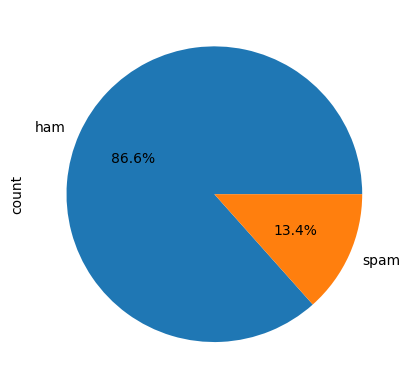

In [9]:
data.target.value_counts().plot(kind='pie',autopct='%1.1f%%')

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
data['target']=encoder.fit_transform(data['target'])

In [12]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
data.duplicated().sum()

403

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.duplicated().sum()

0

In [17]:
data.shape

(5169, 2)

# EDA

In [18]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int32 
 1   text    5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


In [20]:
data.dtypes

target     int32
text      object
dtype: object

In [21]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='Count'>

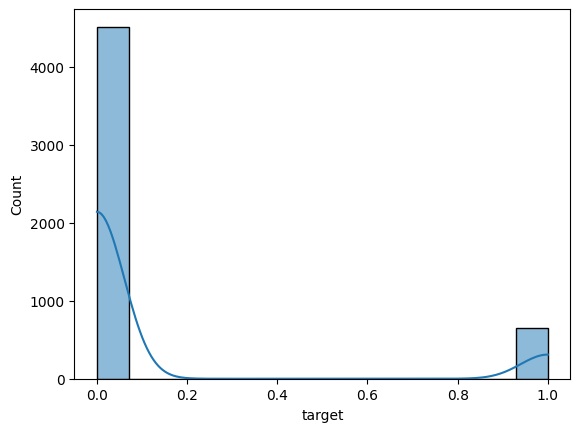

In [22]:
sns.histplot(data['target'],kde=True)

([<matplotlib.patches.Wedge at 0x1746af2c800>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.4%'),
  Text(0.5533635081542612, -0.23192418555038377, '12.6%')])

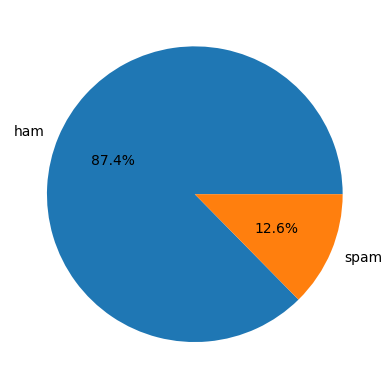

In [23]:
plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct='%1.1f%%')

In [24]:
import nltk

In [25]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [26]:
data['num_characters']=data.text.apply(len) 

In [27]:
data.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
## number of words
data['num_words']=data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [29]:
data['num_sentences']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
data.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [32]:
# ham
data[data['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# Spam
data[data['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
ham=data[data['target'] == 0][['num_characters','num_words','num_sentences']]

In [35]:
ham

,num_characters,num_words,num_sentences
0,111,24,2
1,29,8,2
3,49,13,1
4,61,15,1
6,77,18,2
...,...,...,...
5565,12,4,1
5568,37,9,1
5569,57,15,2
5570,125,27,1


In [36]:
spam=data[data['target'] == 1][['num_characters','num_words','num_sentences']]

In [37]:
spam

,num_characters,num_words,num_sentences
2,155,37,2
5,148,39,4
8,158,32,5
9,154,31,3
11,136,31,3
...,...,...,...
5537,90,18,3
5540,160,38,6
5547,160,35,5
5566,147,30,1


<Axes: xlabel='num_characters', ylabel='Count'>

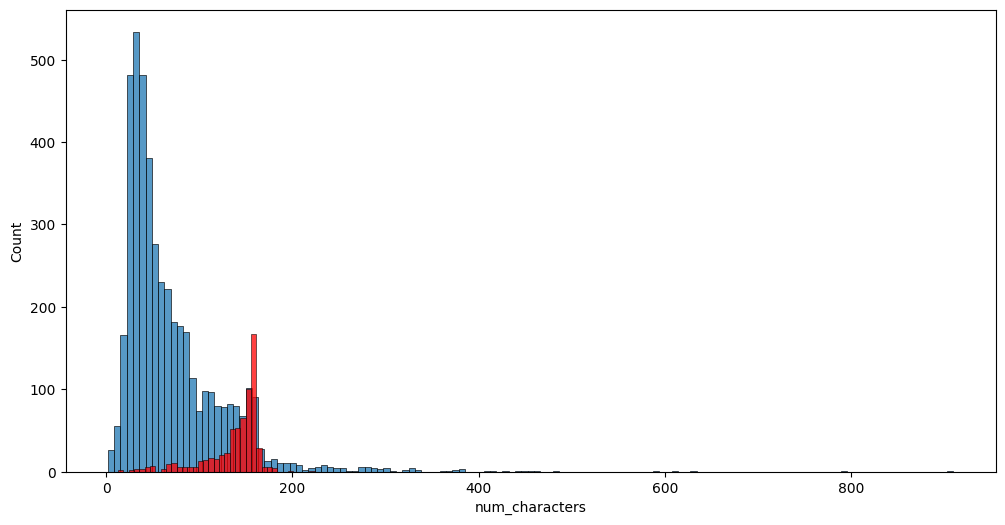

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(ham.num_characters)
sns.histplot(spam.num_characters,color='red')

<Axes: xlabel='num_words', ylabel='Count'>

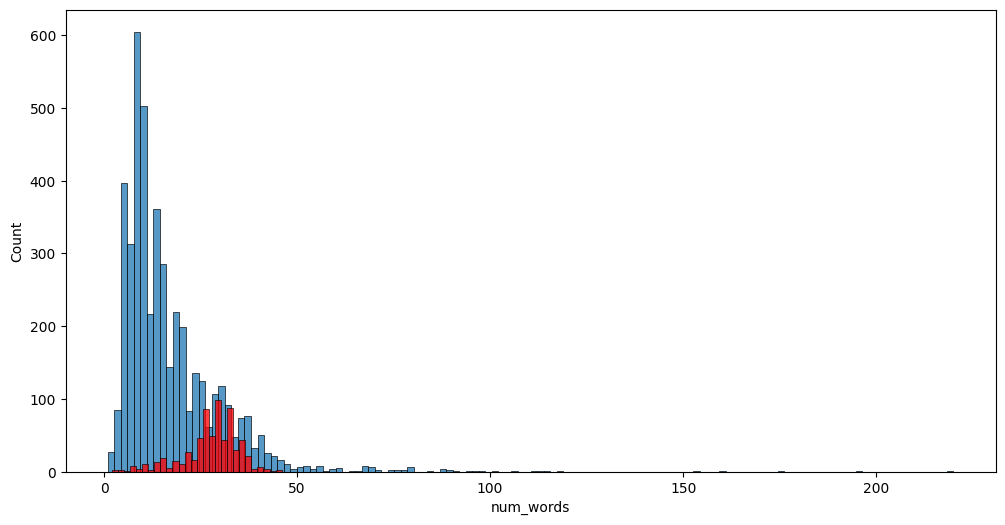

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(ham.num_words)
sns.histplot(spam.num_words,color='red')

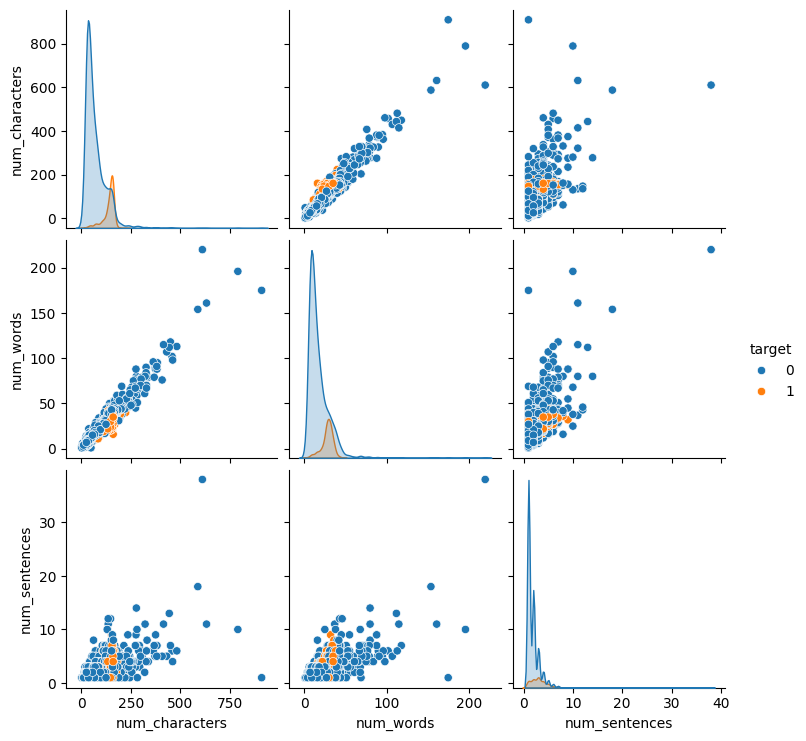

In [40]:
sns.pairplot(data,hue='target')

<Axes: >

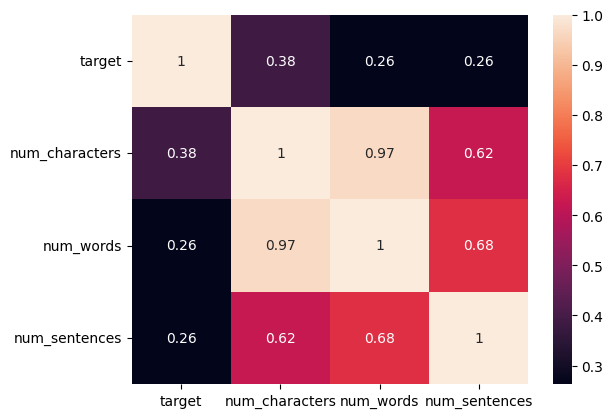

In [41]:
num_col=data.columns[data.dtypes != 'O']
sns.heatmap(data[num_col].corr(),annot=True)

# Data Preprocessing
* Lower case
* Tokenization
* Removing special character
* Removing stop words and punctuation
* Stemming

In [42]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer,WordNetLemmatizer
ps=PorterStemmer()
lem=WordNetLemmatizer()
# string.punctuation
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
def transform_text(text):
    # lowercase conversion
    text = text.lower()
    # Tokenization
    text = nltk.word_tokenize(text)
    y=[]
    # removing special character
    for word in text:
        if word.isalnum():
            y.append(word)
    # removing stopwords
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    stem_y=[]
    y.clear()

    for word in text:
        y.append(ps.stem(word))

    lemm_y=[]

    for word in text:
        lemm_y.append(lem.lemmatize(word))
            
    return " ".join(y)

In [44]:
paragraph="""In below Source code X values are Pareto distributed data 
of count 100. After that we are using probplot which checks whether the 
data is in which distributed form . Here X is in Pareto we know in this case
bcz we assign values intentionally to X.In the real world we didn’t know the data
is in which form we need to Identify. probplot takes two parameters one is our data(X)
and other is our assumption of the data is in which format.Here we assign stats.norm means 
we are assuming data is normal distributed(Gaussian) . On plotting the graph if all the are form
a straight line then our assumption is true or else we need to check with other distribution."""
transform_text(paragraph)

'sourc code x valu pareto distribut data count use probplot check whether data distribut form x pareto know case bcz assign valu intent real world know data form need identifi probplot take two paramet one data x assumpt data assign mean assum data normal distribut gaussian plot graph form straight line assumpt true els need check distribut'

In [45]:
data['transformed_text']=data['text'].apply(transform_text)

In [46]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [47]:
spam_wc=wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))

In [48]:
spam_wc

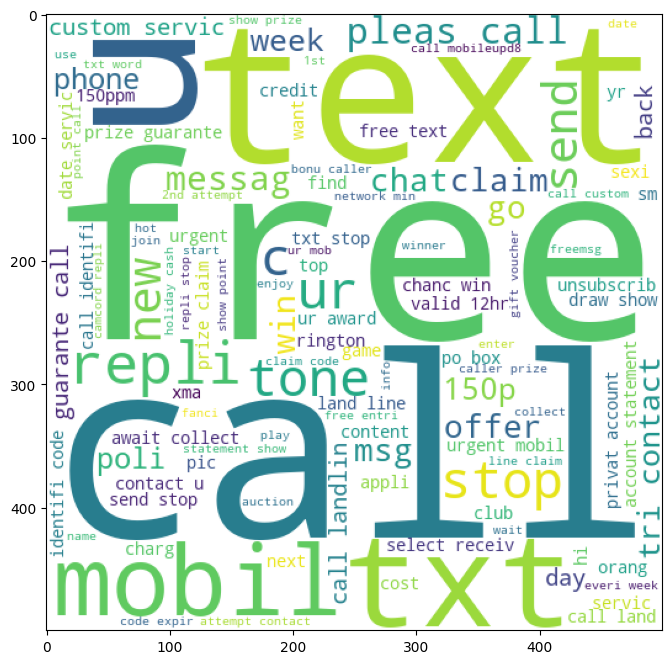

In [49]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

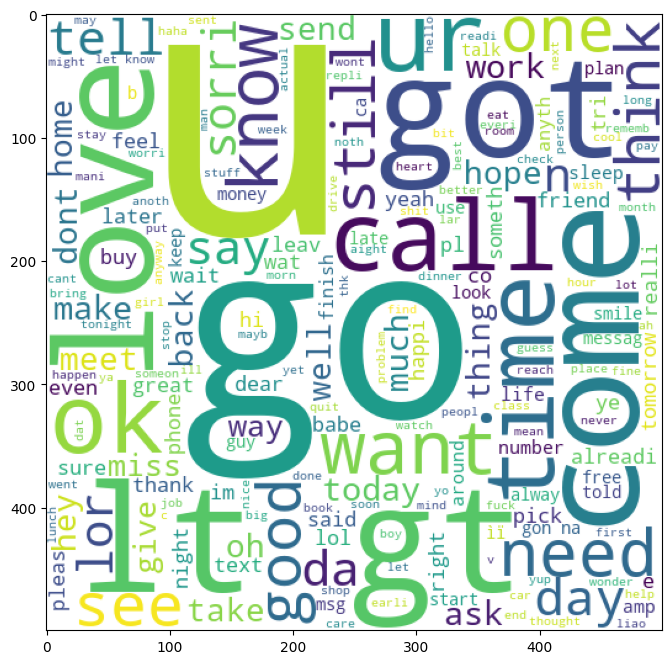

In [50]:
ham_wc=wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,8))
plt.imshow(ham_wc)

In [51]:
## top 30
spam_corpus=[]
for message in data[data['target']==1]['transformed_text'].tolist():
    for words in message.split():
        spam_corpus.append(words)

In [52]:
len(spam_corpus)

9939

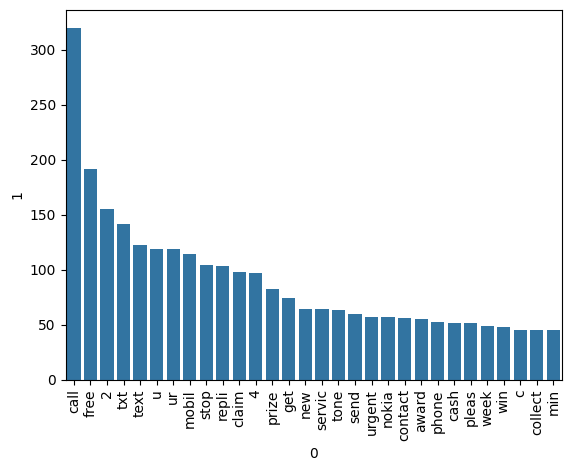

In [53]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [54]:
## top 30
ham_corpus=[]
for message in data[data['target']==0]['transformed_text'].tolist():
    for words in message.split():
        ham_corpus.append(words)

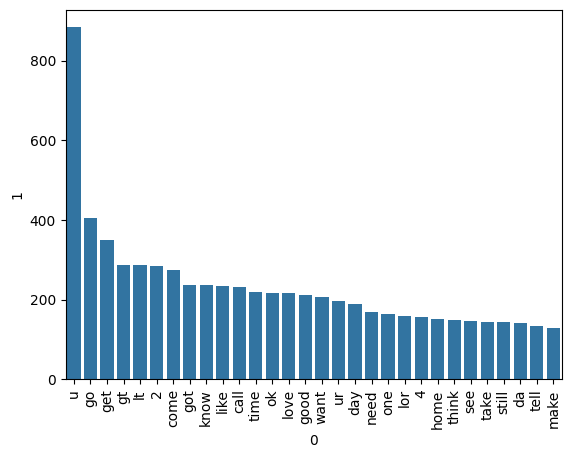

In [55]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building 

In [76]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [77]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [78]:
X.shape

(5169, 3000)

In [79]:
y = data['target'].values

In [80]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=20,random_state=2)

In [82]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [83]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8
[[13  3]
 [ 1  3]]
0.5


In [84]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9
[[16  0]
 [ 2  2]]
1.0


In [85]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.95
[[16  0]
 [ 1  3]]
1.0


In [86]:
## we will keep countvectorize-->mnb,bnb
## we will keep tfidf--> bnb or mnb

In [87]:
# pip install xgboost

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [89]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [90]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [91]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [92]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9, 1.0)

In [93]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9
Precision -  1.0
For  KN
Accuracy -  0.9
Precision -  1.0
For  NB
Accuracy -  0.9
Precision -  1.0
For  DT
Accuracy -  0.95
Precision -  1.0
For  LR
Accuracy -  0.9
Precision -  1.0
For  RF
Accuracy -  0.9
Precision -  1.0


E:\ML_IMPLEMENTATIO\ml-env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.85
Precision -  0.6666666666666666
For  BgC
Accuracy -  0.9
Precision -  0.75
For  ETC
Accuracy -  0.95
Precision -  1.0
For  GBDT
Accuracy -  0.9
Precision -  1.0
For  xgb
Accuracy -  0.9
Precision -  0.75


In [74]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [75]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.90,1.00
2,NB,0.90,1.00
3,DT,0.95,1.00
4,LR,0.90,1.00
5,RF,0.90,1.00
6,AdaBoost,0.90,1.00
8,ETC,0.95,1.00
9,GBDT,0.90,1.00
10,xgb,1.00,1.00
7,BgC,0.90,0.75


In [94]:
performance_df1 = pd.melt(performance_df,id_vars="Algorithm")

In [95]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.90
1,NB,Accuracy,0.90
2,DT,Accuracy,0.95
3,LR,Accuracy,0.90
4,RF,Accuracy,0.90
5,AdaBoost,Accuracy,0.90
6,ETC,Accuracy,0.95
7,GBDT,Accuracy,0.90
8,xgb,Accuracy,1.00
9,BgC,Accuracy,0.90


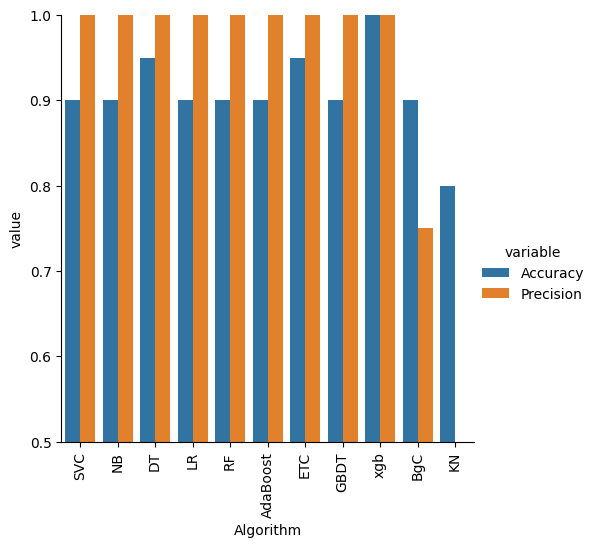

In [96]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [97]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [98]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [99]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [100]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [101]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [102]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [103]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.90,1.00,0.90,1.000000,0.90,1.000000,0.90,1.000000
1,NB,0.90,1.00,0.90,1.000000,0.90,1.000000,0.90,1.000000
2,DT,0.95,1.00,0.95,1.000000,0.95,1.000000,0.95,1.000000
3,LR,0.90,1.00,0.90,1.000000,0.90,1.000000,0.90,1.000000
4,RF,0.90,1.00,0.90,1.000000,0.90,1.000000,0.90,1.000000
5,AdaBoost,0.90,1.00,0.85,0.666667,0.85,0.666667,0.85,0.666667
6,ETC,0.95,1.00,0.95,1.000000,0.95,1.000000,0.95,1.000000
7,GBDT,0.90,1.00,0.90,1.000000,0.90,1.000000,0.90,1.000000
8,xgb,1.00,1.00,0.90,0.750000,0.90,0.750000,0.90,0.750000
9,BgC,0.90,0.75,0.90,0.750000,0.90,0.750000,0.90,0.750000


In [104]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [105]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [106]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [107]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9
Precision 1.0
